In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import neurokit2 as nk
import pickle
import scipy

plt.rcParams["figure.figsize"] = (20, 5)

In [112]:
i = 8

with open(f"D:/School/CL_Datasets/WESAD/data/S{i+1}/S{i+1}.pkl", "rb") as f:
    data = pickle.load(f, encoding="latin1")
    wesad = data["signal"]["chest"]["ECG"].flatten()

clas = pd.read_csv(f"D:/School/CL_Datasets/CLAS/Participants/Part{i}/by_block/1_ecg_.csv")

In [113]:
clas

,Timestamp,PythonTimestamp,ecg1,ecg2
0,1719469,1.551872e+09,-605.000072,-5.440639
1,1719597,1.551872e+09,-605.000072,-5.530503
2,1719725,1.551872e+09,-605.000072,-5.669121
3,1719853,1.551872e+09,-605.000072,-5.754945
4,1719981,1.551872e+09,-605.000072,-5.678785
...,...,...,...,...
15360,3685549,1.551872e+09,-605.000072,-0.218168
15361,3685677,1.551872e+09,-605.000072,0.313585
15362,3685805,1.551872e+09,-605.000072,0.941981
15363,3685933,1.551872e+09,-605.000072,0.860050


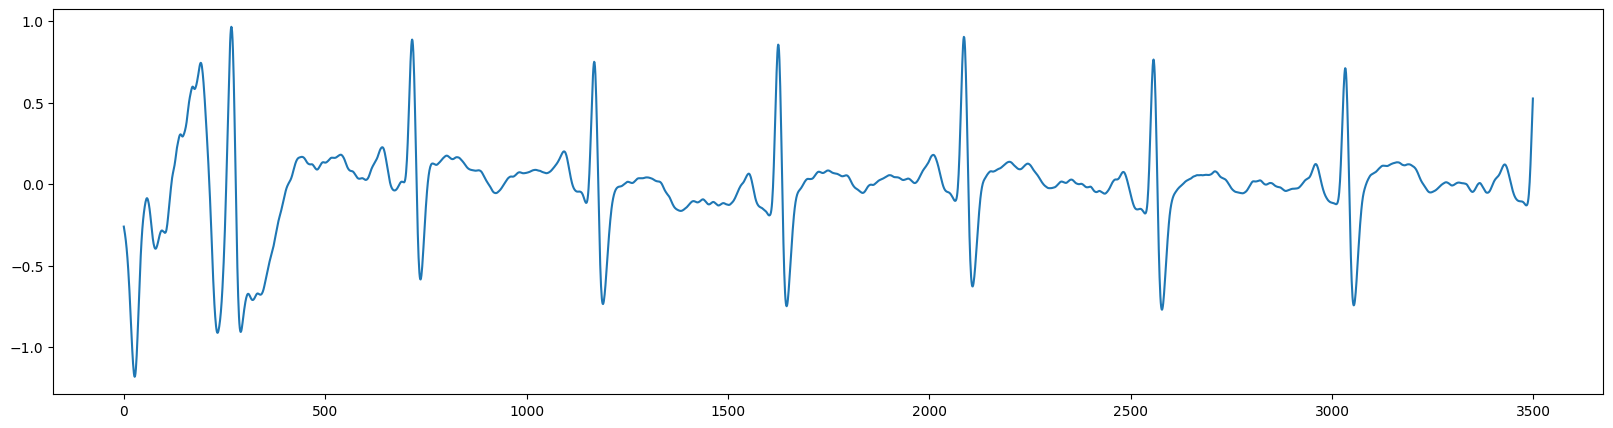

In [119]:
ecg1 = wesad - scipy.signal.savgol_filter(wesad, 171, 3)
ecg1 = nk.ecg_clean(wesad, sampling_rate=700, method="nk")
plt.plot(ecg1[:5 * 700])

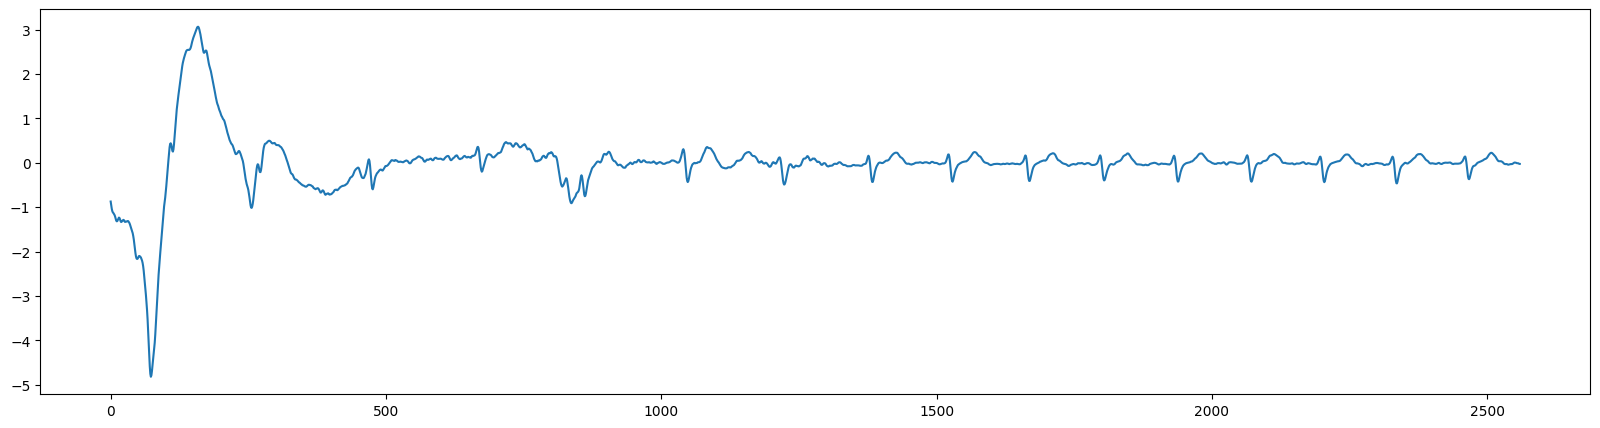

In [118]:
# ecg2 = nk.ecg_clean(clas["ecg2"], sampling_rate=256, method="pantompkins1985")
# ecg2 = clas["ecg2"] - scipy.signal.savgol_filter(clas["ecg2"], 71, 3)
ecg2 = nk.ecg_clean(clas["ecg2"], sampling_rate=256, method="nk")
plt.plot(ecg2[:10 * 256])